In [3]:
import pandas as pd

In [4]:
data = {'year': [1,2,3,4,5,6,7,8,9,10,11,12],
        'gdp': [100.0, 112.0, 115.0, 123.0, 122.0, 132.0, 143.0, 126.0, 166.0, 157.0, 176.0, 180.0],
        'calls': [25.0, 27.0, 22.0, 27.0, 32.0, 33.0, 40.0, 30.0, 34.0, 47.0, 33.0, 45.0],
        'emp': [45.0, 53.0, 54.0, 58.0, 60.0, 65.0, 72.0, 65.0, 85.0, 97.0, 98.0, 100.0],
        'items': [11.0, 11.0, 12.0, 14.0, 14.0, 15.0, 16.0, 16.0, 17.0, 18.0, 18.0, 20.0],
        'rev': [2000.0, 2400.0, 2700.0, 2900.0, 3200.0, 3500.0, 4000.0, 4200.0, 4500.0, 4700.0, 4900.0, 5000.0]}

In [5]:
df = pd.DataFrame(data)

The author kindly rescaled the variables so we are good to go

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='gdp', ylabel='year'>,
        <AxesSubplot:xlabel='calls', ylabel='year'>,
        <AxesSubplot:xlabel='emp', ylabel='year'>,
        <AxesSubplot:xlabel='items', ylabel='year'>,
        <AxesSubplot:xlabel='rev', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='gdp'>,
        <AxesSubplot:xlabel='gdp', ylabel='gdp'>,
        <AxesSubplot:xlabel='calls', ylabel='gdp'>,
        <AxesSubplot:xlabel='emp', ylabel='gdp'>,
        <AxesSubplot:xlabel='items', ylabel='gdp'>,
        <AxesSubplot:xlabel='rev', ylabel='gdp'>],
       [<AxesSubplot:xlabel='year', ylabel='calls'>,
        <AxesSubplot:xlabel='gdp', ylabel='calls'>,
        <AxesSubplot:xlabel='calls', ylabel='calls'>,
        <AxesSubplot:xlabel='emp', ylabel='calls'>,
        <AxesSubplot:xlabel='items', ylabel='calls'>,
        <AxesSubplot:xlabel='rev', ylabel='calls'>],
       [<AxesSubplot:xlabel='year', ylabel='emp'>,
        <Axes

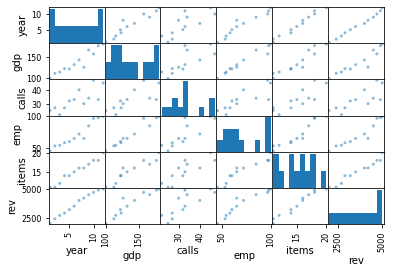

In [6]:
pd.plotting.scatter_matrix(df)

The default scatter matrix plot is quite ugly but it gives us an idea of which variables are correlated.

By looking at the plot we can see how all of the of the variables including revenue are growing with time (first column of the scatter matrix). For that reason, when examining the rightmost column of the scatter matrix, we can see that all of variables are positively correlated with revenue.

In a situation like this I don't see a point of including more than one variable into the model, since all we will get otherwise are problems with collinearity. The variable I will choose is year.

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
model = smf.ols(formula='rev ~ year', data=df)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    rev   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     841.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           5.54e-11
Time:                        23:13:32   Log-Likelihood:                -73.057
No. Observations:                  12   AIC:                             150.1
Df Residuals:                      10   BIC:                             151.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1825.7576     71.876     25.401      0.0

C:\Users\peyruz.gasimov\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We can see a high value of R<sup>2</sup> is achieved, 0.988. Let's predict revenue for the next year.

Let's make a prediction for the next year

In [9]:
import numpy as np

In [10]:
res.predict(pd.DataFrame(columns=['year'], data=[13]))

0    5507.575758
dtype: float64